In [71]:
%matplotlib inline

import math
import numpy as np
from numpy import linalg as lg
import matplotlib.pyplot as plt

# some constants


### Кривая Коха
Кривая Коха является типичным геометрическим фракталом. Процесс её построения выглядит следующим образом: берём единичный отрезок, разделяем на три равные части и заменяем средний интервал равносторонним треугольником без этого сегмента. В результате образуется ломаная, состоящая из четырёх звеньев длины 1/3. На следующем шаге повторяем операцию для каждого из четырёх получившихся звеньев и т. д… Предельная кривая и есть кривая Коха.

In [72]:
def koch_iteration(points):
    if len(points) < 2:
        return None
    
    def rotate(v, angle):
        return (v[0]*math.cos(angle) - v[1]*math.sin(angle), 
               v[0]*math.sin(angle) + v[1]*math.cos(angle))
    
    new_points = []
    for i in range(len(points)-1):        
        v = (points[i+1][0] - points[i][0], points[i+1][1] - points[i][1])
        u = (float(v[0])/3., float(v[1])/3.)
        w = rotate(u, math.pi/3.)
        
        new_points.append((points[i][0], points[i][1]))
        new_points.append((points[i][0] + u[0], points[i][1] + u[1]))
        new_points.append((points[i][0] + u[0] + w[0], points[i][1] + u[1] + w[1]))
        new_points.append((points[i][0] + 2.*u[0], points[i][1] + 2.*u[1]))
        
    new_points.append((points[len(points)-1][0], points[len(points)-1][1]))
    return new_points

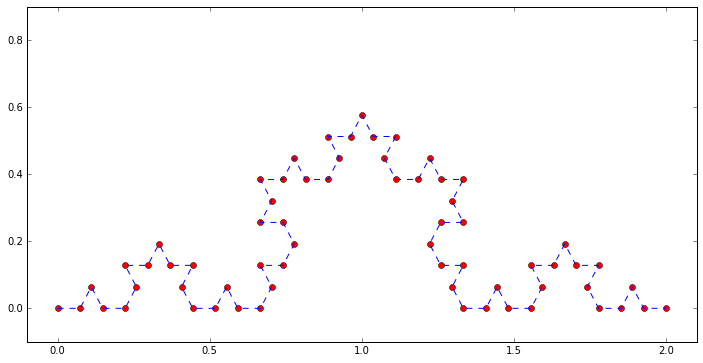

In [74]:
pylab.rcParams['figure.figsize'] = (12, 6)

points = [(0, 0), (2, 0)]

points = koch_iteration(points)
points = koch_iteration(points)
points = koch_iteration(points)

x = [points[i][0] for i in range(len(points))]
y = [points[i][1] for i in range(len(points))]

plt.axis([-0.1, 2.1, -0.2, 0.8])
plt.plot(x, y, 'ro')
plt.plot(x, y, '--')
plt.show()